In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import sklearn
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

## Load regression model

In [2]:
# Load Regression Data
regression_data_df = pd.read_csv("./data/data_salaries_normalized_df_kk.csv")
regression_feature_list = regression_data_df.columns
# Features: fcredit_amount, checking_status, age, duration, purpose, credit_history, employment, savings_status, property_magnitude, residence_since, installment_commitment, personal_status, job, other_payment_plans, housing, existing_credits, class
print(f"Classification Features: \n f{', '.join(regression_feature_list)}")
print(len(regression_feature_list))
print()
#Our target will be '', we will using 1 present good and 0 present bad
regression_data_type = regression_data_df.dtypes 
print(f"Regression Data Type: \n f{regression_data_type}")

Classification Features: 
 fwork_year, experience_level, employment_type, job_title, remote_ratio, company_location, company_size, salary_in_usd
8

Regression Data Type: 
 fwork_year           float64
experience_level    float64
employment_type     float64
job_title           float64
remote_ratio        float64
company_location    float64
company_size        float64
salary_in_usd         int64
dtype: object


#### The data we first feed has 8 columns . Our target is salary_in_usd: continous data
#### I have encoded categorical type using label encoder and ordinal encoder, I have done normalization to prevent larger scaled #### features dominant the result, I also used feature selection to remove unimportant data 

In [3]:
regression_data_df.drop(['salary_in_usd'], axis=1)

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,1.000000,1.000000,1.000000,0.913043,1.0,0.352113,1.0
1,1.000000,0.666667,0.666667,0.717391,1.0,0.985915,0.0
2,1.000000,0.666667,0.666667,0.717391,1.0,0.985915,0.0
3,1.000000,1.000000,1.000000,0.510870,1.0,0.169014,0.5
4,1.000000,1.000000,1.000000,0.510870,1.0,0.169014,0.5
...,...,...,...,...,...,...,...
3687,0.333333,1.000000,1.000000,0.532609,1.0,0.985915,1.0
3688,0.333333,0.666667,1.000000,0.913043,1.0,0.985915,1.0
3689,0.000000,0.000000,1.000000,0.510870,1.0,0.985915,0.0
3690,0.000000,0.000000,0.666667,0.184783,1.0,0.985915,1.0


## Split data

In [4]:
#Split Regression dataset into a training set and a test set
regression_X = regression_data_df.drop('salary_in_usd', axis=1)
regression_y = regression_data_df["salary_in_usd"]
regression_X_train,regression_X_test,regression_y_train,regression_y_test = train_test_split(regression_X.values,regression_y,test_size=0.2,random_state=0)

Using split data could help to justify the test design. It is more reliable as the data from the same dataset should follow the same distribution. (Just be mindful not overlap training and testing data in case of introducing overfitting)

In [5]:
regression_y_train

1299    284000
2604     38154
427     170000
1042    205920
1015    127467
         ...  
835     121700
3264    140400
1653    185900
2607    170000
2732    150000
Name: salary_in_usd, Length: 2953, dtype: int64

In [29]:
#Choose an algorithm for Regression 
# GradientBoostingRegressor
# LinearRegression
# 

#### I have used linear regression and gradient boosting to train the model.
#### This study is a supervised learning study, as all the data points are labeled, use the data points as inputs to build a model to get a desired output. And target class is continuous data, which is regression question. 

#### Regression model used to predict real numbers. For linear regression, it uses the value of one variable to predict the value of another variable. 

#### Gradient Boosting is an Ensembles method,and . It is similar to the tree algorithm and could deal with both classification and regression problem. Ensembles combines a set of classifiers and combine their decisions in some way to get the result (voting, stacking and etc). It could handle errors or even correct errors. 
#### But there is some constraints : each classier needs to be better than random (otherwise the combination may result worse); and each classifier needs to disagree with each other(they will infer each other)




## LinearRegression

In [30]:
# LinearRegression
regression_lr_model = LinearRegression()
regression_lr_model.fit(regression_X_train, regression_y_train)
regression_lr_model_predicts = regression_lr_model.predict(regression_X_test)

#calculaye evaluation stats
print(f"MSE: {sklearn.metrics.mean_squared_error(regression_lr_model_predicts, regression_y_test, squared=False)}")
print(f"MAE: {sklearn.metrics.mean_absolute_error(regression_y_test, regression_lr_model_predicts)}")
print(f"R^2: {sklearn.metrics.r2_score(regression_y_test, regression_lr_model_predicts)}")

MSE: 47867.72033498932
MAE: 37894.03362966263
R^2: 0.3068943288522371


## GradientBoostingRegressor

In [31]:
#GradientBoostingRegressor
param_dist = {
    'n_estimators': np.arange(10, 100),
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None]
}
regression_gb_reg_model = GradientBoostingRegressor()
random_search = RandomizedSearchCV(regression_gb_reg_model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(regression_X_train, regression_y_train)
#RandomizedSearchCV: randomized search over hyperparameter values for an estimator. I
#n_iter: The number of parameter settings that are sampled.
#cv: The number of cross-validation splits ( 5-fold cross-validation).
#random_state: A random seed for reproducibility.

regression_gbr_model = random_search.best_estimator_
regression_gbr_model.fit(regression_X_train, regression_y_train)#use best parameter to feed model
regression_gbr_model_predicts = regression_gbr_model.predict(regression_X_test)

print(f"MSE: {sklearn.metrics.mean_squared_error(regression_gbr_model_predicts, regression_y_test, squared=False)}")
print(f"MAE: {sklearn.metrics.mean_absolute_error(regression_y_test, regression_gbr_model_predicts)}")
print(f"R^2: {sklearn.metrics.r2_score(regression_y_test, regression_gbr_model_predicts)}")


MSE: 41140.905856390236
MAE: 32391.0757408486
R^2: 0.4880097835573627


c:\Users\Tao\Desktop\MSA\venv-msa\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Tao\Desktop\MSA\venv-msa\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Tao\Desktop\MSA\venv-msa\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Tao\Desktop\MSA\venv-msa\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\U

# Evaluate the model

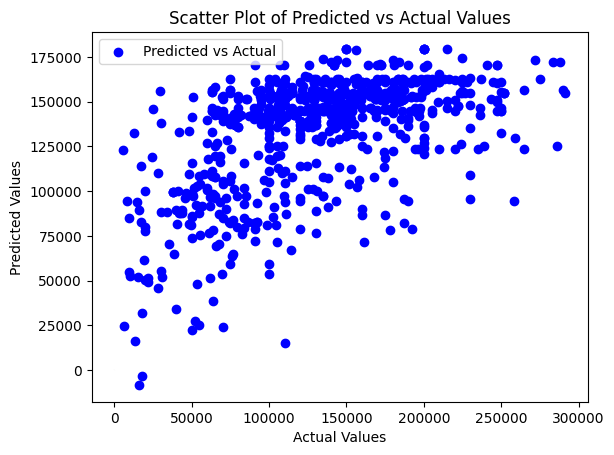

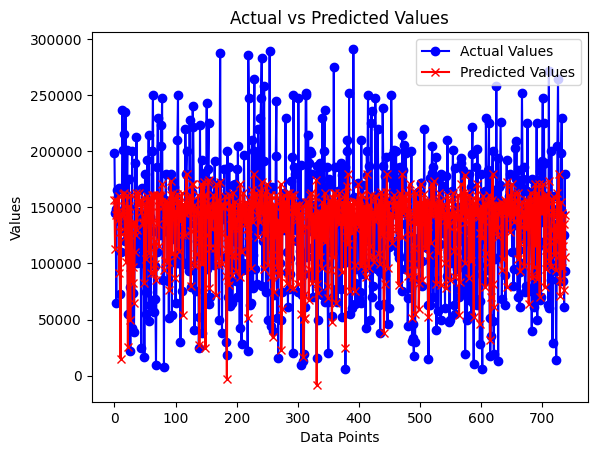

In [28]:
##Linear Regression


plt.scatter(regression_y_test, regression_lr_model_predicts, color='b', label='Predicted vs Actual')
plt.plot([0, 10], [0, 10], color='gray', linestyle='--')  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.show()


x_values = list(range(len(regression_lr_model_predicts)))
plt.plot(x_values, regression_y_test, color='b', marker='o', label='Actual Values')

plt.plot(x_values, regression_lr_model_predicts, color='r', marker='x', label='Predicted Values')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

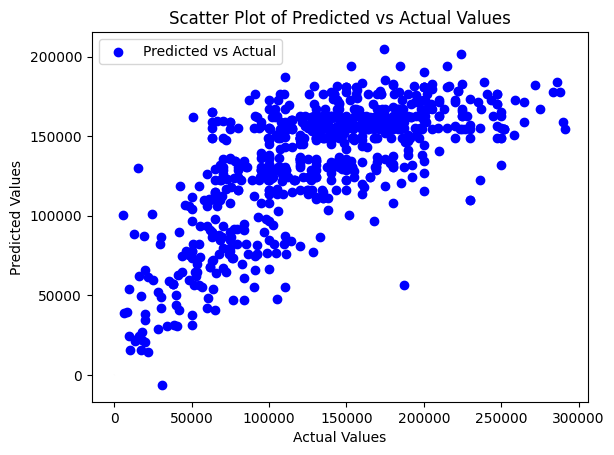

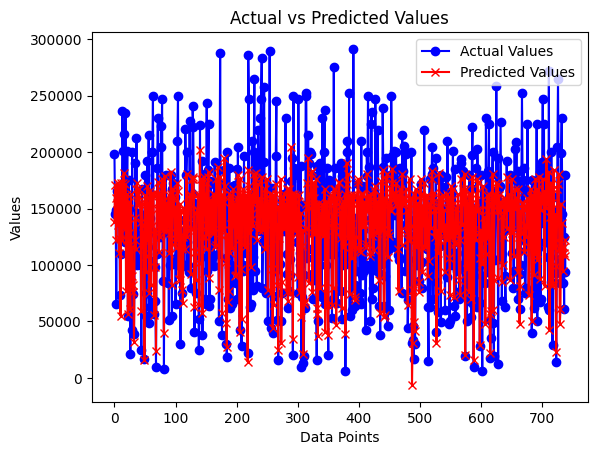

In [27]:
# Gradient Boost
plt.scatter(regression_y_test, regression_gbr_model_predicts, color='b', label='Predicted vs Actual')
plt.plot([0, 10], [0, 10], color='gray', linestyle='--')  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.show()


x_values = list(range(len(regression_gbr_model_predicts)))
plt.plot(x_values, regression_y_test, color='b', marker='o', label='Actual Values')

plt.plot(x_values, regression_gbr_model_predicts, color='r', marker='x', label='Predicted Values')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## Summary

Steps: 
    I have split the data with training set (80%) and test_set(20%)

     Then I used RandomizedSearchCV to figure the best parameter for gradient boost models.

     I have used two model: linear regressionn (regression algorithm), gradient boosting (ensembles)

     I have print out the MSE, MAE and R^2

     Then I also plot the predicted value and actual value to have better evaluation

Result:
    MAE and MSE value are large for both methods, which refer that the predicted value and the true value are far away from each other. This may due to the wider range of target, or implicit outliers may shift the distribution. 

    The R^2 is relatively low as well which means around 48% of the variance in the taget variable is capture by model's prediction
    
    Gradient Boosting model relatively performs better result may due to algorithm differecen as regression algorithm could handle errors but the result may skew. While ensembels algorithm is more robust in this case.

Interesting finding:
    
    while we were doing feature selection, we noticed that the correlation between salary and target is not siginificant, but in reality, they are interconvertable from one and another. From this, we should keep in mind that combine the real world senarios while doing the data analyze.